In [21]:
import torch

torch.manual_seed(0)

x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x)

In [22]:
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 50)
        self.act1 = nn.Tanh()
        self.fc2 = nn.Linear(50, 30)
        self.act2 = nn.Tanh()
        self.fc3 = nn.Linear(30, 20)
        self.act3 = nn.Tanh()
        self.out = nn.Linear(20, 1)
        

    def forward(self, x):
        x = self.fc1(x)    
        x = self.act1(x)       
        x = self.fc2(x)    
        x = self.act2(x)     
        x = self.fc3(x)    
        x = self.act3(x)   
        x = self.out(x)
        return x


In [23]:
model = MyModel()
loss_fn = nn.MSELoss()  # funkcja straty
optimizer = torch.optim.Adam(model.parameters())

In [24]:
for epoch in range(3000):
    y_pred = model(x)                  # forward pass
    loss = loss_fn(y_pred, y)         # obliczamy stratę

    optimizer.zero_grad()             # zerujemy gradienty
    loss.backward()                   # backpropagation
    optimizer.step()                  # aktualizacja wag

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.5580
Epoch 100, Loss: 0.1711
Epoch 200, Loss: 0.0673
Epoch 300, Loss: 0.0174
Epoch 400, Loss: 0.0022
Epoch 500, Loss: 0.0003
Epoch 600, Loss: 0.0001
Epoch 700, Loss: 0.0001
Epoch 800, Loss: 0.0000
Epoch 900, Loss: 0.0000
Epoch 1000, Loss: 0.0000
Epoch 1100, Loss: 0.0000
Epoch 1200, Loss: 0.0000
Epoch 1300, Loss: 0.0000
Epoch 1400, Loss: 0.0000
Epoch 1500, Loss: 0.0000
Epoch 1600, Loss: 0.0000
Epoch 1700, Loss: 0.0000
Epoch 1800, Loss: 0.0000
Epoch 1900, Loss: 0.0000
Epoch 2000, Loss: 0.0000
Epoch 2100, Loss: 0.0000
Epoch 2200, Loss: 0.0000
Epoch 2300, Loss: 0.0000
Epoch 2400, Loss: 0.0000
Epoch 2500, Loss: 0.0000
Epoch 2600, Loss: 0.0000
Epoch 2700, Loss: 0.0000
Epoch 2800, Loss: 0.0000
Epoch 2900, Loss: 0.0000


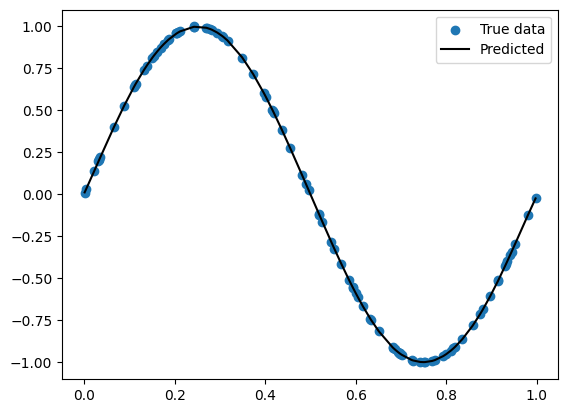

In [25]:
import matplotlib.pyplot as plt

# Posortuj dane po x, aby linia była gładka
sorted_indices = x[:, 0].argsort()
x_sorted = x[sorted_indices]
y_pred_sorted = model(x_sorted).detach()

# Rysuj poprawny wykres
plt.scatter(x.numpy(), y.numpy(), label="True data")
plt.plot(x_sorted.numpy(), y_pred_sorted.numpy(), color="black", label="Predicted")
plt.legend()
plt.show()
